### Launches as API call to USDA, grabs yields of crop,then plots data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [ ]:
def crop_yields(unit_desc_param):

    # These are the parameters in the API that you choose.
    ploads = {'format': 'JSON',
              'or_desc': 'CROPS',
              'domain_desc': 'TOTAL',
              'agg_level_desc': 'STATE',
              'state_name': 'IOWA',
              'commodity_desc': 'CORN',
              'unit_desc': unit_desc_param,
              'statisticcat_desc': 'YIELD',
              'reference_period_desc': 'YEAR',
              }
    # key (make a parameter)
    r = requests.get("https://quickstats.nass.usda.gov/api/api_GET/?key=1C757E50-5169-30CC-BEFD-40A5C3E2A43D", params=ploads)
    # execute get request
    dt1 = json.dumps(r.json(), indent=2, sort_keys=True)
    # make it json format
    obj1 = json.loads(dt1)

    # collect relevant data for each object created
    dt2 = []
    for i in obj1["data"]:
        dt2.append([i["year"], i["reference_period_desc"], i["commodity_desc"], i["Value"], i['unit_desc']])
    # convert from dictionary format to pandas
    dt3 = pd.DataFrame.from_dict(dt2)
    return dt3

# select unit
desc1 = ['BU / ACRE']
# create separate lists for each description (good, excellent)
df100 = []
for desc in desc1:
    df100.append(crop_yields(desc))
    
df100

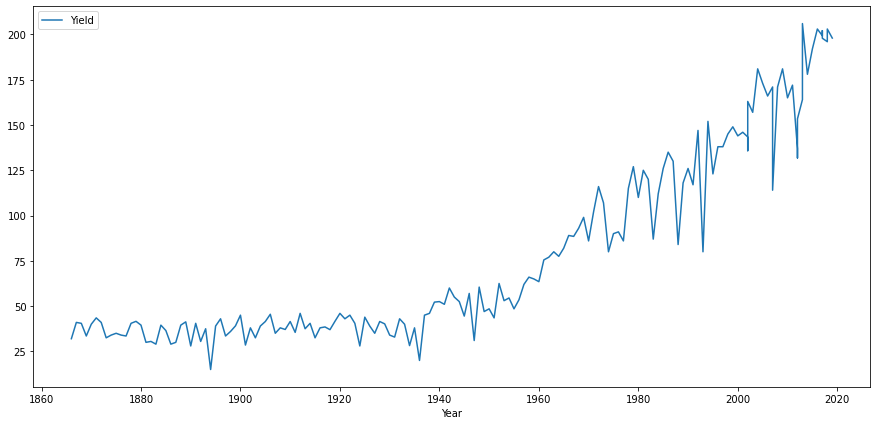

In [5]:
# combine dataframes and plot
df10 = pd.concat(df100)
df10.columns = ["Year", "Period", "Crop", "Yield", "Unit"]     
df10.sort_values(by=['Year'], inplace = True)
df10.set_index("Year", inplace = True)
df10["Yield"] = df10["Yield"].astype(float)  
df10.head(500)
df10[["Yield"]].plot(figsize=(15,7))